In [100]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}


In [101]:
df = pd.read_csv("../data/raw/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}


In [102]:
print("Shape:", df.shape)

print("\n Data Types:")
print(df.dtypes)

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Unique values in text columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"  {col:20s} → {df[col].unique()}")

Shape: (545, 13)

 Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

 Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 Unique values in text columns:
  mainroad             → ['yes' 'no']
  guestroom            → ['no' 'yes']
  basement             → ['no' 'yes']
  hotwaterheating      → ['no' 'yes']
  airconditioning      → ['yes' 'no']
  prefarea             → ['yes' 'no']
  furnishingstatus     → [

10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}


In [103]:
df_cleaned = df.copy() 

print(f"Shape: {df_cleaned.shape}")

Shape: (545, 13)


In [104]:
binary_cols = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea'] 

for col in binary_cols:
    df_cleaned[col] = df_cleaned[col].map({'yes': 1, 'no': 0}) 

print(f"   Columns encoded: {binary_cols}")

   Columns encoded: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [105]:
print(df['furnishingstatus'].value_counts())

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [106]:
furnishing_map = {
    'unfurnished'    : 0,   
    'semi-furnished' : 1,   
    'furnished'      : 2   
}

df_cleaned['furnishingstatus'] = df_cleaned['furnishingstatus'].map(furnishing_map)

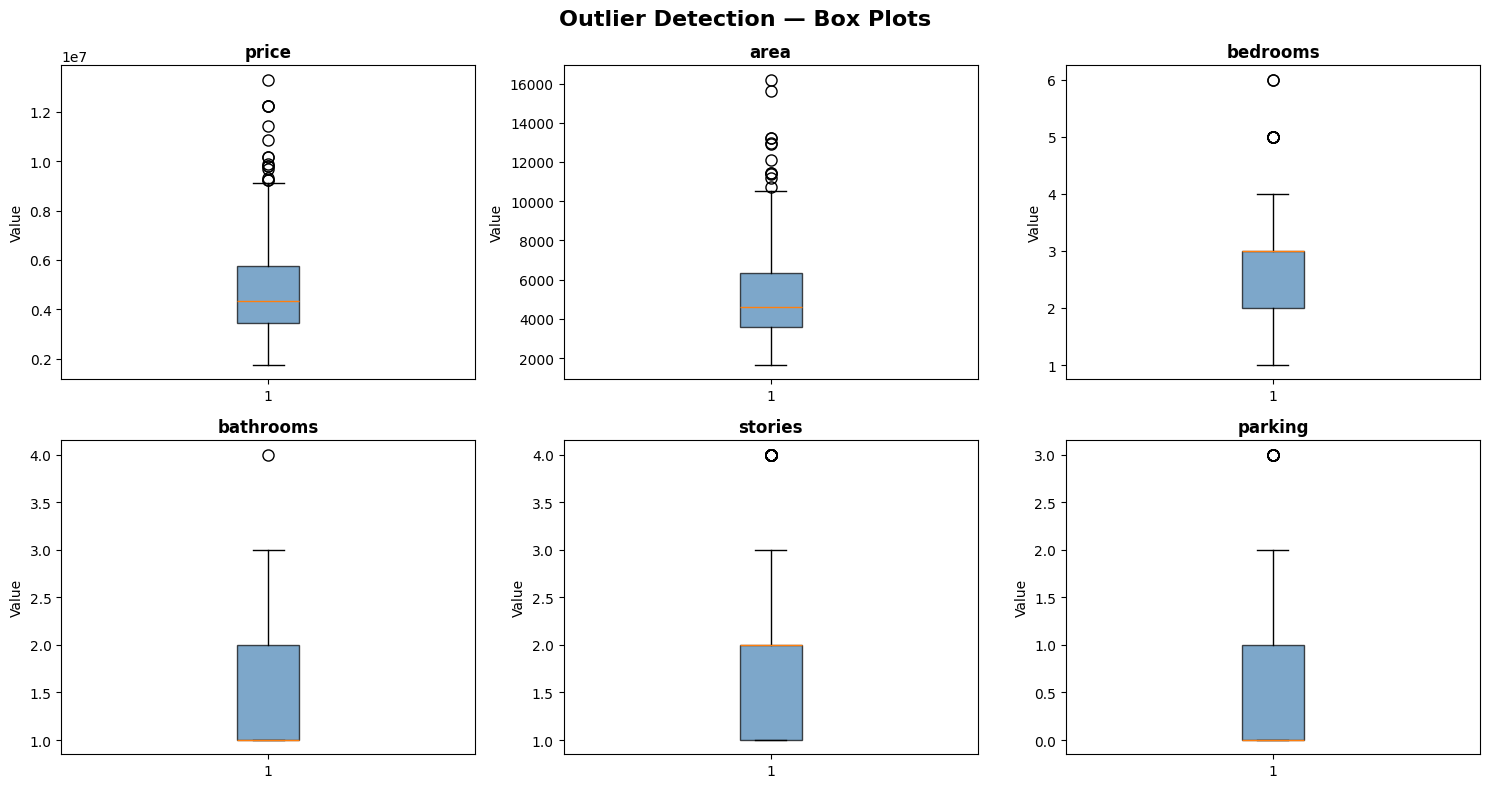

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Outlier Detection — Box Plots", fontsize=16, fontweight='bold')

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    
    axes[row][col_idx].boxplot(df[col], patch_artist=True,
                                boxprops=dict(facecolor='steelblue', alpha=0.7),
                                flierprops=dict(marker='o', color='red', 
                                                markersize=8, label='Outlier'))
    axes[row][col_idx].set_title(f"{col}", fontsize=12, fontweight='bold')
    axes[row][col_idx].set_ylabel("Value")

plt.tight_layout()
plt.show()

In [108]:
print("=" * 60)
print("ACTUAL OUTLIER VALUES IN YOUR DATASET")
print("=" * 60)

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

all_outlier_indices = set()

for col in numeric_cols:
    Q1  = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    all_outlier_indices.update(outliers.index)

    if len(outliers) > 0:
        print(f"\n Column: '{col}'")
        print(f"     Normal range : {lower:,.0f}  →  {upper:,.0f}")
        print(f"     Outlier rows : {len(outliers)}")
        print(f"\n     Actual outlier values:")
        for idx, val in outliers[col].items():
            print(f"       Row {idx:>3}  →  {val:>12,.0f}  ⚠️")
    else:
        print(f"\n '{col}' — No outliers found")

print("\n" + "=" * 60)
print(f"TOTAL UNIQUE ROWS WITH OUTLIERS: {len(all_outlier_indices)}")
print(f"   Row indices: {sorted(all_outlier_indices)}")
print("=" * 60)

ACTUAL OUTLIER VALUES IN YOUR DATASET

 Column: 'price'
     Normal range : -35,000  →  9,205,000
     Outlier rows : 15

     Actual outlier values:
       Row   0  →    13,300,000  ⚠️
       Row   1  →    12,250,000  ⚠️
       Row   2  →    12,250,000  ⚠️
       Row   3  →    12,215,000  ⚠️
       Row   4  →    11,410,000  ⚠️
       Row   5  →    10,850,000  ⚠️
       Row   6  →    10,150,000  ⚠️
       Row   7  →    10,150,000  ⚠️
       Row   8  →     9,870,000  ⚠️
       Row   9  →     9,800,000  ⚠️
       Row  10  →     9,800,000  ⚠️
       Row  11  →     9,681,000  ⚠️
       Row  12  →     9,310,000  ⚠️
       Row  13  →     9,240,000  ⚠️
       Row  14  →     9,240,000  ⚠️

 Column: 'area'
     Normal range : -540  →  10,500
     Outlier rows : 12

     Actual outlier values:
       Row   7  →        16,200  ⚠️
       Row  10  →        13,200  ⚠️
       Row  56  →        11,440  ⚠️
       Row  64  →        11,175  ⚠️
       Row  66  →        13,200  ⚠️
       Row  69  →        

In [110]:
outlier_rows = df.loc[sorted(all_outlier_indices)]

print(f"\n COMPLETE DETAILS OF {len(outlier_rows)} OUTLIER ROWS:\n")
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 200)      
print(outlier_rows.to_string())


 COMPLETE DETAILS OF 82 OUTLIER ROWS:

        price   area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0    13300000   7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1    12250000   8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2    12250000   9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3    12215000   7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
4    11410000   7420         4          1        2      yes       yes      yes              no             yes        2       no        furnished
5    10850000   7500         3          3        1      yes        no      yes      

MEAN vs MEDIAN vs MODE for PRICE COLUMN

  Mean   (Average)        : ₹   4,766,729
  Median (Middle value)   : ₹   4,340,000
  Mode   (Most common)    : ₹   3,500,000

  Difference (Mean-Median): ₹     426,729

  If Mean > Median by a lot → outliers are pulling
     the mean UPWARD → use MEDIAN to handle them


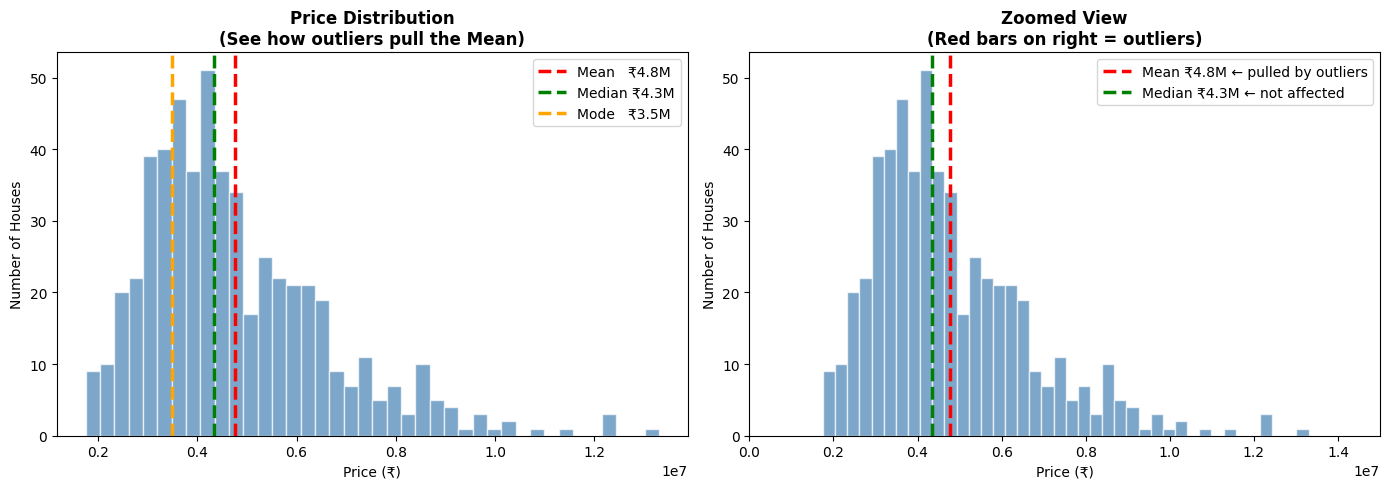

In [111]:
prices = df['price']

mean   = prices.mean()   
median = prices.median()  
mode   = prices.mode()[0] 

print("=" * 55)
print("MEAN vs MEDIAN vs MODE for PRICE COLUMN")
print("=" * 55)
print(f"\n  Mean   (Average)        : ₹{mean:>12,.0f}")
print(f"  Median (Middle value)   : ₹{median:>12,.0f}")
print(f"  Mode   (Most common)    : ₹{mode:>12,.0f}")

print(f"\n  Difference (Mean-Median): ₹{mean-median:>12,.0f}")
print(f"\n  If Mean > Median by a lot → outliers are pulling")
print(f"     the mean UPWARD → use MEDIAN to handle them")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(prices, bins=40, color='steelblue', 
             edgecolor='white', alpha=0.7)
axes[0].axvline(mean,   color='red',    linewidth=2.5, 
                linestyle='--', label=f'Mean   ₹{mean/1e6:.1f}M')
axes[0].axvline(median, color='green',  linewidth=2.5, 
                linestyle='--', label=f'Median ₹{median/1e6:.1f}M')
axes[0].axvline(mode,   color='orange', linewidth=2.5, 
                linestyle='--', label=f'Mode   ₹{mode/1e6:.1f}M')
axes[0].set_title("Price Distribution\n(See how outliers pull the Mean)", 
                   fontsize=12, fontweight='bold')
axes[0].set_xlabel("Price (₹)")
axes[0].set_ylabel("Number of Houses")
axes[0].legend()

axes[1].hist(prices, bins=40, color='steelblue', 
             edgecolor='white', alpha=0.7)
axes[1].axvline(mean,   color='red',   linewidth=2.5, linestyle='--',
                label=f'Mean ₹{mean/1e6:.1f}M ← pulled by outliers')
axes[1].axvline(median, color='green', linewidth=2.5, linestyle='--',
                label=f'Median ₹{median/1e6:.1f}M ← not affected')
axes[1].set_xlim(0, 15000000)
axes[1].set_title("Zoomed View\n(Red bars on right = outliers)", 
                   fontsize=12, fontweight='bold')
axes[1].set_xlabel("Price (₹)")
axes[1].set_ylabel("Number of Houses")
axes[1].legend()

plt.tight_layout()
plt.show()

In [112]:
os.makedirs("../data/cleaned", exist_ok=True) 
df_cleaned.to_csv("../data/cleaned/Housing_cleaned.csv", index=False)

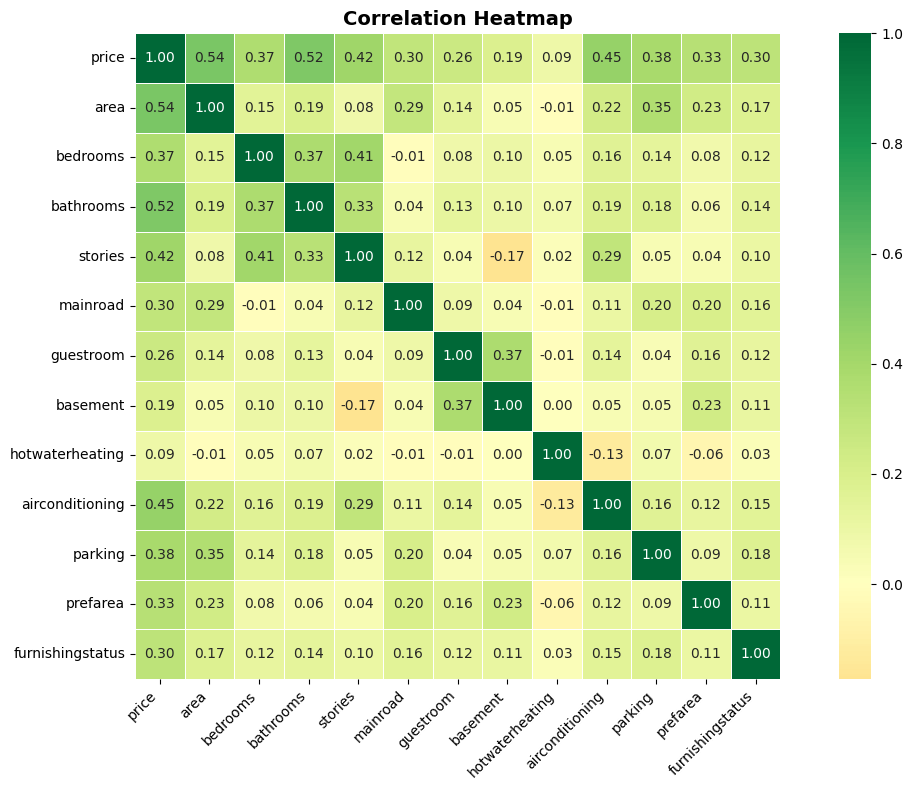


 FEATURES MOST CORRELATED WITH PRICE:
   area                                +0.536  ██████████
   bathrooms                           +0.518  ██████████
   airconditioning                     +0.453  █████████
   stories                             +0.421  ████████
   parking                             +0.384  ███████
   bedrooms                            +0.366  ███████
   prefarea                            +0.330  ██████
   furnishingstatus                    +0.305  ██████
   mainroad                            +0.297  █████
   guestroom                           +0.256  █████
   basement                            +0.187  ███
   hotwaterheating                     +0.093  █


In [113]:
df_model = df_cleaned.copy()  

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_model.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n FEATURES MOST CORRELATED WITH PRICE:")
price_corr = df_model.corr()['price'].drop('price').sort_values(ascending=False)
for feat, corr in price_corr.items():
    bar = "█" * int(abs(corr) * 20)
    print(f"   {feat:35s} {corr:+.3f}  {bar}")

In [114]:
X = df_model.drop(columns=['price'])
y = df_model['price']

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling done!")
print(f"   Features : {X.shape[1]} columns")
print(f"   Samples  : {X.shape[0]} rows")

Scaling done!
   Features : 12 columns
   Samples  : 545 rows


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Split done!")
print(f"   Train : {len(X_train)} rows (80%)")
print(f"   Test  : {len(X_test)} rows (20%)")


Split done!
   Train : 436 rows (80%)
   Test  : 109 rows (20%)


In [119]:
os.makedirs("../data/cleaned", exist_ok=True)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.to_csv("../data/cleaned/X_train.csv", index=False)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df.to_csv("../data/cleaned/X_test.csv", index=False)

y_train_df = pd.DataFrame(y_train.values, columns=['price'])
y_train_df.to_csv("../data/cleaned/y_train.csv", index=False)

y_test_df = pd.DataFrame(y_test.values, columns=['price'])
y_test_df.to_csv("../data/cleaned/y_test.csv", index=False)

print(f"\n   X_train.csv → {X_train_df.shape[0]} rows × {X_train_df.shape[1]} cols")
print(f"   X_test.csv  → {X_test_df.shape[0]} rows × {X_test_df.shape[1]} cols")
print(f"   y_train.csv → {y_train_df.shape[0]} rows (price labels)")
print(f"   y_test.csv  → {y_test_df.shape[0]} rows (price labels)")




   X_train.csv → 436 rows × 12 cols
   X_test.csv  → 109 rows × 12 cols
   y_train.csv → 436 rows (price labels)
   y_test.csv  → 109 rows (price labels)


10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}
10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}
10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\